<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 11: PART 1- LOGISTIC REGRESSION

1) (a ) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.


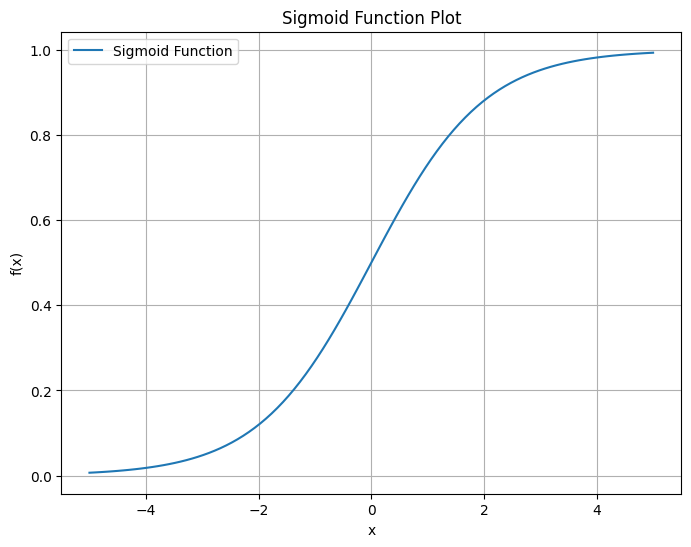

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

# Plotting
x = np.linspace(-5, 5, 100)
y = sigmoid_fun(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


The sigmoid function has an S-shaped curve that maps any real-valued number to the range (0,1). This property makes it particularly useful in binary classification problems where we want to predict the probability that an input belongs to a certain class. <br>
Outputs close to 0 is in one class and outputs close to 1 is taken in other class

(b) Plot the log functions in the cost function individually. Print your interpretation of the log functions


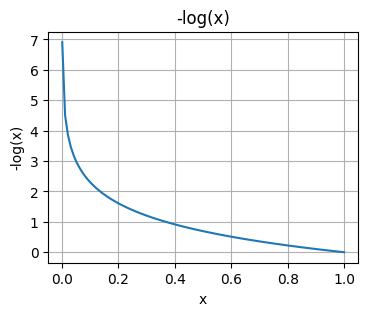

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# log functions definition
def log_fn1(x):
    return -np.log(x)

def log_fn2(x):
    return -np.log(1 - x)

# Data points for plotting
x_val = np.linspace(0.001,0.999,100)
log_val1 = log_fn1(x_val)
log_val2 = log_fn2(x_val)

# Plot log_val1
plt.figure(figsize=(4, 3))
plt.plot(x_val, log_val1)
plt.title('-log(x)')
plt.xlabel('x')
plt.ylabel('-log(x)')
plt.grid(True)
plt.show()

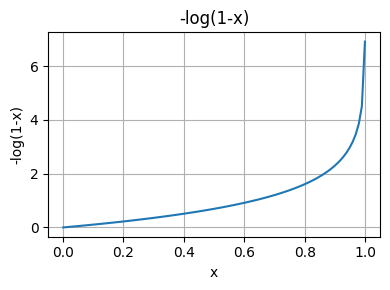

In [ ]:
# Plot log_val2
plt.figure(figsize=(4, 3))
plt.plot(x_val, log_val2)
plt.title('-log(1-x)')
plt.xlabel('x')
plt.ylabel('-log(1-x)')
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretation:

Log Loss for Positive Case -log(x): This plot shows the log loss when the true label is 1 (y=1). As the predicted probability (y_hat) approaches 1, the log loss approaches 0. So when the predicted probability of class 1 is close to 1 and the true label is also 1, the loss should be minimized.

Log Loss for Negative Case -log(1-x): This plot shows the log loss when the true label is 0 (i.e., y=0). As the predicted probability approaches 0, the log loss approaches 0. So when the predicted probability of class 1 is close to 0 and the true label is also 0, the loss should be minimized.

These plots shows the behavior of the log functions in the cross-entropy loss function and how they hwlp to penalize deviations between predicted probabilities and true labels.

  c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. Also, using cross entropy as the cost function, plot it as well as its contours.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/univariate_linear_regression.csv')
df.head()

,x,y
0,-1.932,-13.569
1,-2.953,-19.207
2,8.879,17.665
3,9.259,15.835
4,3.033,-0.495


In [ ]:
# Taking pandas dataframe having both features and label. With last column being the label
def grad_desc(data, lr = 0.01, max_iter = 5000):
  x = data.iloc[:, :-1].values  # Extracting features
  y = data.iloc[:, -1].values # Extracting labels
  m = x.shape[0]  # no. of samples
  n = x.shape[1]  # no. of features
  # initialize weights wi
  w = np.random.randn(n+1)
  grads = np.zeros(len(w))
  # create x0 of 1s
  x0 = np.ones(m)
  x = np.insert(x,0,x0,axis = 1)
  cost_vals = []
  w_vals = []
  for _ in range(max_iter):
    y_hat = x@w
    cost_val = np.sum((y_hat - y)**2)/(2*m)     # Mean squared error cost function
    cost_vals.append(cost_val)
    for i in range(len(grads)):
      grads[i] = np.dot((y_hat - y), x[:,i])/m
    w = w - lr*grads
    w_vals.append(w)
  return w, cost_vals, w_vals, y_hat

In [ ]:
# Applying gradiend descent on the given input data
w, loss, w_list, _ = grad_desc(df, max_iter=1000)

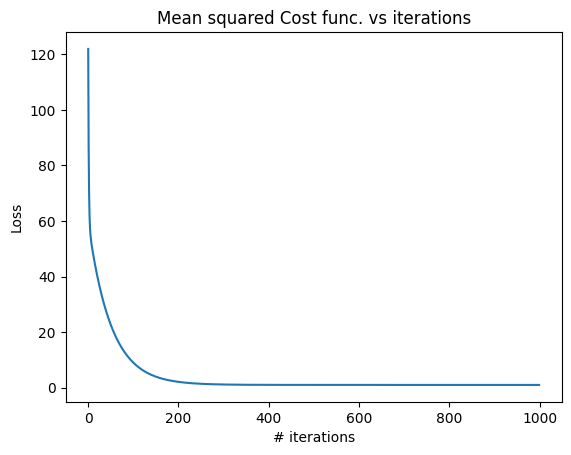

In [ ]:
# Loss function v/s iterations
iters = range(1000)
plt.plot(iters, loss)
#plt.plot(x_val, y_val, label = 'Regression line', color = 'red')
plt.xlabel('# iterations')
plt.ylabel('Loss')
plt.title('Mean squared Cost func. vs iterations')
plt.show()

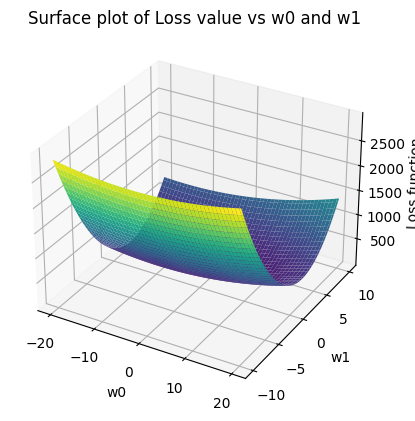

In [ ]:
# Linear regression
# Surface plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating sample data of weights for plotting loss function
w0 = np.linspace(-20, 20, 100)
w1 = np.linspace(-10, 10, 100)
outputs = np.zeros((len(w0), len(w1)))

xval = df.iloc[:, :-1].values
x0 = np.ones(xval.shape[0])
xval = np.insert(xval,0,x0,axis = 1)
yval = df.iloc[:, -1].values

# Function to calculate loss value
def linear_reg_loss(w0,w1):
  w = np.array([w0,w1])
  y_hat = xval@w
  cost_val = np.sum((y_hat - yval)**2)/(2*xval.shape[0])
  return cost_val

for i, val_w0 in enumerate(w0):
    for j, val_w1 in enumerate(w1):
        # Call function with current combination of w0 and w1 values
        output = linear_reg_loss(val_w0, val_w1)
        outputs[i, j] = output    # Store loss values

W0, W1 = np.meshgrid(w0, w1)
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, outputs.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss function')
ax.set_title('Surface plot of Loss value vs w0 and w1')
plt.show()

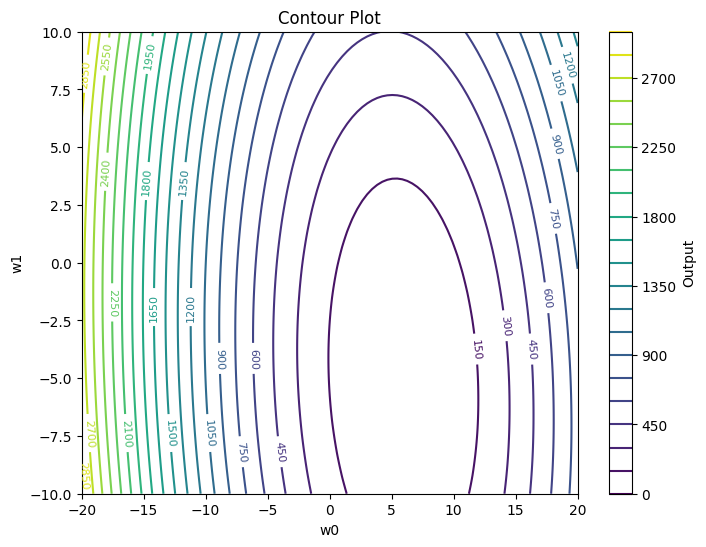

In [ ]:
# Contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(w0, w1, outputs, levels=20)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Contour Plot')
plt.colorbar(label='Output')
plt.clabel(contour, inline=True, fontsize=8)
plt.show()

In [ ]:
# Cross entropy cost function

In [ ]:
# Taking pandas dataframe having both features and label. With last column being the label
def grad_desc_cross_entropy(data, lr = 0.01, max_iter = 5000):
  x = data.iloc[:, :-1].values  # Extracting features
  y = data.iloc[:, -1].values # Extracting labels
  m = x.shape[0]  # no. of samples
  n = x.shape[1]  # no. of features
  # initialize weights wi
  w = np.random.randn(n+1)
  grads = np.zeros(len(w))
  # create x0 of 1s
  x0 = np.ones(m)
  x = np.insert(x,0,x0,axis = 1)
  cost_vals = []
  w_vals = []
  epsilon = 1e-15
  for _ in range(max_iter):
    y_hat = np.clip(sigmoid_fun(x@w),epsilon, 1 - epsilon)
    cost_val = -1 * (1 / m) * np.sum((y * np.log(abs(y_hat))) + ((1 - y) * np.log(abs(1 - y_hat))))     # Cross entropy cost function
    cost_vals.append(cost_val)
    for i in range(len(grads)):
      grads[i] = np.dot((y_hat - y), x[:,i])/m
    w = w - lr*grads
    w_vals.append(w)
  return w, cost_vals, w_vals, y_hat

In [ ]:
# Applying gradiend descent on the given input data
w2, loss_cross_entropy, w_list2, _ = grad_desc_cross_entropy(df, max_iter=1000)

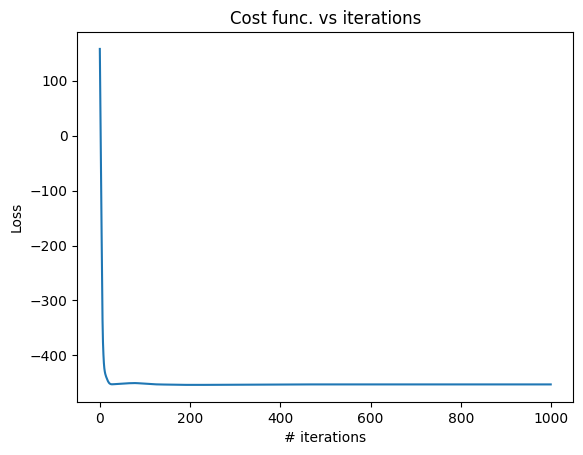

In [ ]:
# Loss function v/s iterations
iters = range(1000)
plt.plot(iters, loss_cross_entropy)
#plt.plot(x_val, y_val, label = 'Regression line', color = 'red')
plt.xlabel('# iterations')
plt.ylabel('Loss')
plt.title('Cost func. vs iterations')
plt.show()

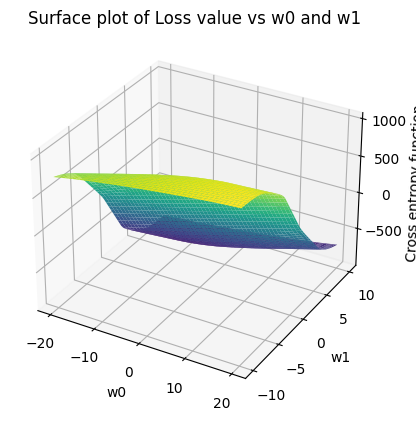

In [ ]:
# Cross entropy
# Surface plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating sample data of weights for plotting loss function
w0 = np.linspace(-20, 20, 100)
w1 = np.linspace(-10, 10, 100)
outputs1 = np.zeros((len(w0), len(w1)))

xval = df.iloc[:, :-1].values
x0 = np.ones(xval.shape[0])
xval = np.insert(xval,0,x0,axis = 1)
yval = df.iloc[:, -1].values

# Function to calculate loss value
def cross_entropy_loss(w0,w1):
  m = len(y)
  w = np.array([w0,w1])
  epsilon = 1e-15
  y_hat = np.clip(sigmoid_fun(xval@w),epsilon, 1 - epsilon)
  cost_val = -1 * (1 / m) * np.sum((yval * np.log(y_hat)) + ((1 - yval) * np.log(1 - y_hat)))
  return cost_val

for i, val_w0 in enumerate(w0):
    for j, val_w1 in enumerate(w1):
        # Call function with current combination of w0 and w1 values
        output = cross_entropy_loss(val_w0, val_w1)
        outputs1[i, j] = output    # Store loss values

W0, W1 = np.meshgrid(w0, w1)
# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, outputs1.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cross entropy function')
ax.set_title('Surface plot of Loss value vs w0 and w1')
plt.show()

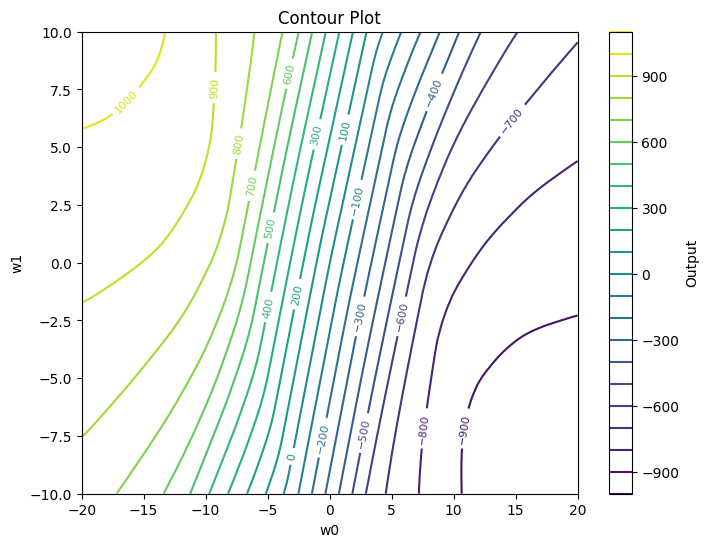

In [ ]:
# Contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(w0, w1, outputs1, levels=20)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Contour Plot')
plt.colorbar(label='Output')
plt.clabel(contour, inline=True, fontsize=8)
plt.show()